In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(8, input_dim = 4, activation='selu', kernel_initializer='uniform'))
model.add(Dense(6, activation='selu', kernel_initializer='uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

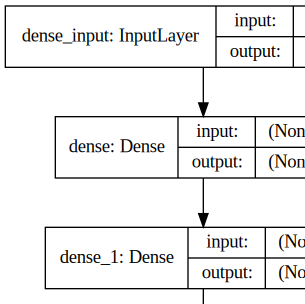

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot',format='svg'))

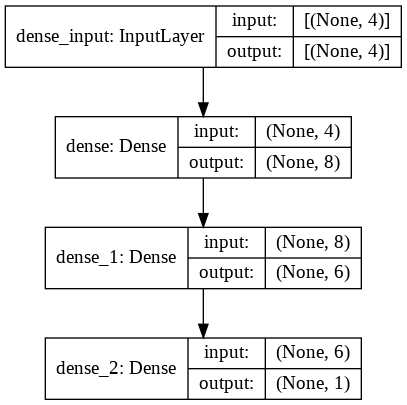

In [ ]:

from keras.utils.vis_utils import plot_model

plot_model(model, to_file ='name.png', show_shapes=True, show_layer_names = True)

In [ ]:
model = Sequential() # 연속적
model.add(Dense(30, input_shape=(5,), activation='relu')) # Dense - out, input - inpput_dim, activation => 출력 형태를 결정
model.add(Dense(3)) # 이전의 30 output 자동으로 input으로 들어온다

In [ ]:
import torch
import torch.nn as nn

In [ ]:
import pandas as pd

pd.read

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(5, 30), # D_in => input_data의 개수, H => 히든 레이어의 수
    torch.nn.ReLU(), # Rechified Liner Unit(양수만 정렬)
    torch.nn.Linear(30, 5) # H -> 히든레이어의 수가 input으로, D_out -> 아웃풋으로
)

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=5, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=5, bias=True)
)


In [ ]:
import torch
# N은 배치 크기, D_in은 입력의 차원
# H는 은닉층의 차원, D_out은 출력 차원
N, D_in, H, D_out = 64, 1000, 100, 10

# 입력과 출력을 저장하기 위해 무작위 값을 갖는 Tensor를 생성
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# nn패키지를 사용하여 모델을 순차적 계층으로 정의(Sequence of layers)
# nn.Sequential은 다른 Module들을 포함하는 Module로, 그 Module들을 순차적으로 적용하여 출력을 생성
# 각각의 Linear Module은 선형함수를 사용, 입력으로부터 출력을 계산, 내부 Tensor에 가중치와 편향을 저장
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)
# 또한 nn패키지에는 널리 사용하는 손실함수들에 대한 정의도 포함
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for ep in range(500):
  # 순전파 단계 : 모델에 x를 전달하여 예상되는 y값을 계산. Module객체는 __call__연산자를 덮어써 함수처럼 호출
  # 이렇게 함으로써 입력 데이터의 Tensor를 Module에 전달하여 출력데이터의 Tensor를 생성
  y_pred = model(x)

  # 손실함수를 계산하고 출력. 예측한 y와 정답인 y를 갖는 Tensor들을 전달하고, 손실 함수는 손실 값을 갖는 Tensor를 반환
  loss = loss_fn(y_pred, y)
  if ep % 100 == 99:
    print('epoch : %d' % ep, 'total_loss : %f' % loss.item(), '\t', param, '\n')

  # 역전파 단계를 실행하기 전에 변화도를 0으로(본래 변화도를 누적하기 때문에 RNN에서만 사용)
  model.zero_grad()

  # 역전파 단계 : 모델의 학습 가능한 모든 매개변수에 대해 손실의 변화도를 계산. 내부적으로 각 Module의 매개변수는 requires_grad = True일 때,
  # Tensor 내에 저장되므로, 이 호출은 모든 모델의 모든 학습 가능한 매개변수의 변화도를 계산  
  loss.backward()

  # gradient descent를 사용하여 가중치를 갱신, 각 매개변수는 Tensor이므로 이전에 했던 것과 같이 변화도에 접근
  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate * param.grad

epoch : 99 total_loss : 3.124254 	 Parameter containing:
tensor([ 0.0166,  0.0867, -0.1021, -0.0579,  0.1184, -0.0014,  0.0461,  0.0772,
         0.0110,  0.0246], requires_grad=True) 

epoch : 199 total_loss : 0.061525 	 Parameter containing:
tensor([ 0.0166,  0.0873, -0.1014, -0.0584,  0.1189, -0.0031,  0.0468,  0.0767,
         0.0109,  0.0250], requires_grad=True) 

epoch : 299 total_loss : 0.002250 	 Parameter containing:
tensor([ 0.0167,  0.0874, -0.1013, -0.0585,  0.1189, -0.0033,  0.0469,  0.0767,
         0.0109,  0.0249], requires_grad=True) 

epoch : 399 total_loss : 0.000100 	 Parameter containing:
tensor([ 0.0167,  0.0874, -0.1013, -0.0585,  0.1189, -0.0034,  0.0469,  0.0767,
         0.0109,  0.0249], requires_grad=True) 

epoch : 499 total_loss : 0.000005 	 Parameter containing:
tensor([ 0.0167,  0.0874, -0.1013, -0.0585,  0.1189, -0.0034,  0.0469,  0.0767,
         0.0109,  0.0249], requires_grad=True) 



### __init__

- 클래스 초기화 initialization
- 클래스 (빵틀) -> 인스턴스 (빵)
- 즉, 스스로 만든 인스턴스 (빵)를 부르는 이름 self

- 클래스 초기화를 하는데, 
  1. 전에 있던거 상속('위'에서 연결) 받을 래 super()
  2. 상속(연결은 됐는데)된 걸 초기화할 래 super().__init__()

- 상속 Inheritance

class Robot:  == SuperClass
  def __init__(self, name):
    self.name = name
  
  def say_hi(self): # 메서드
    print("Hi, I am " + self.name)

class PhysicianRobot(Robot):
  def say_hi(self):
    super().say_hi()
    print(self.name + "takes care of you")

- __init__ -> super
- 클래스 초기화를 하는데, 
  1. 전에 있던거 상속('위'에서 연결) 받을래
  2. 상속(연결은 됐는데) 된 걸 초기화 할래
    Super.__init__()

### Cov.net 구현 방식과 연결
class Net(nn.Module):

  def __init__(self):
  * super(Net, self).__init__()
    ##### 입력 이미지 채널 1개, 출력 채널 6개, 3x3의 정사각 컨볼루션 행렬
    ##### 컨볼루션 커널 정의

  * self.conv1 = nn.Conv2d(1, 6, 3)
  * self.conv2 = nn.Conv2d(6, 16, 3)

In [ ]:
# Inputs = 5, Outputs = 3, Hidden = 30
self.fc1 = nn.Linear(5, 30)
self.fc2 = nn.Linear(30, 3)

class Network(nn.Module):
  
  def __init__(self, state_size, action_size):
    super(Network, self).__init__()
    
  def forward(self, state):
    x = F.relu(self.fc1(state))
    outputs = self.fc2(x)
    return outputs

----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for path, dir ,files in os.walk('drive/MyDrive/Colab Notebooks'):
  for file_name in files:
    print(file_name)

kaggle_DS_FAQ_1.ipynb의 사본
Untitled0.ipynb
Untitled1.ipynb
Untitled2.ipynb
test.ipynb
